# Exploratory Data Analysis (EDA) of Brent Oil Prices

This notebook performs an initial exploratory data analysis (EDA) of the Brent oil price time series. The goal is to understand the data's characteristics, identify any potential issues, and visually examine how key historical events might correlate with major price fluctuations.

1. Load Data and Basic Information
- First, we'll import the necessary libraries and load our raw and event datasets. We'll use os to build robust file paths relative to the notebook's location.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# Define file paths relative to the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(project_root, 'data', 'raw', 'brent_oil_prices.csv')
events_path = os.path.join(project_root, 'data','events', 'key_events.csv')

# Load the datasets
try:
    df_prices = pd.read_csv(data_path)
    df_events = pd.read_csv(events_path)
    print("Data loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check that the files are in the correct directories.")



Data loaded successfully!


2. Initial Data Inspection
- Next, we inspect the first few rows, data types, and summary statistics of the raw Brent oil price data. This helps us confirm the data format and identify any immediate issues, such as incorrect data types.

In [3]:
print("--- Brent Oil Prices Data Info ---")
df_prices.info()
print("\n--- Brent Oil Prices Head ---")
print(df_prices.head())
print("\n--- Brent Oil Prices Summary Statistics ---")
print(df_prices.describe())

print("\n--- Key Events Data Info ---")
df_events.info()
print("\n--- Key Events Head ---")
print(df_events.head())



--- Brent Oil Prices Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB

--- Brent Oil Prices Head ---
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63

--- Brent Oil Prices Summary Statistics ---
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000

--- Key Events Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         15 non-null     object
 1   Event        15 non-null     o

3. Initial Visualization of Raw Data
- We will visualize the raw daily Brent oil prices to get a sense of the overall trend, seasonality, and volatility over time.

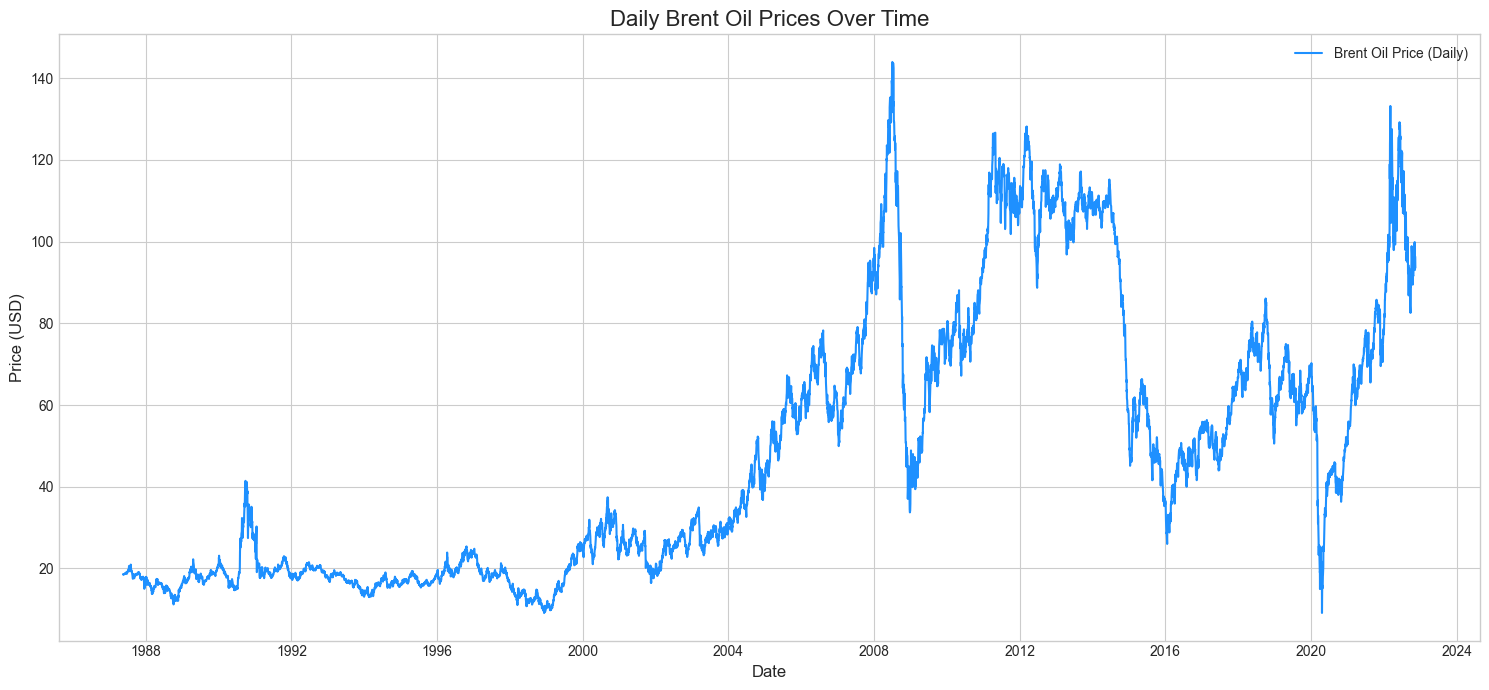

In [4]:
# Convert 'Date' to datetime objects for proper plotting
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='mixed', dayfirst=True)

# Plot the raw daily prices
plt.figure(figsize=(15, 7))
plt.plot(df_prices['Date'], df_prices['Price'], label='Brent Oil Price (Daily)', color='dodgerblue')
plt.title('Daily Brent Oil Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



4. Preprocessing for Monthly Analysis
-  For change point analysis, it is often beneficial to resample the data to a lower frequency (e.g., monthly) to reduce noise and focus on major shifts. This mirrors the logic in our data_preparation.py script.

In [5]:
# Set 'Date' as the index
df_prices.set_index('Date', inplace=True)

# Resample to monthly frequency (Month Start) using the mean price
df_prices_monthly = df_prices['Price'].resample('MS').mean().to_frame()

# Fill any missing monthly values using forward fill, then backward fill
df_prices_monthly = df_prices_monthly.ffill().bfill()

# Convert the events dates to datetime as well
df_events['Date'] = pd.to_datetime(df_events['Date'])

print("Data has been resampled to a monthly frequency and cleaned.")
print("\n--- Processed Monthly Price Data Head ---")
print(df_prices_monthly.head())



Data has been resampled to a monthly frequency and cleaned.

--- Processed Monthly Price Data Head ---
                Price
Date                 
1987-05-01  18.580000
1987-06-01  18.860476
1987-07-01  19.856522
1987-08-01  18.979524
1987-09-01  18.313182


5. Visualizing Monthly Data with Key Events
- Finally, we'll plot the monthly resampled data and overlay the key events as vertical lines. This allows for a quick visual inspection of whether major events seem to coincide with significant changes in the price trend.

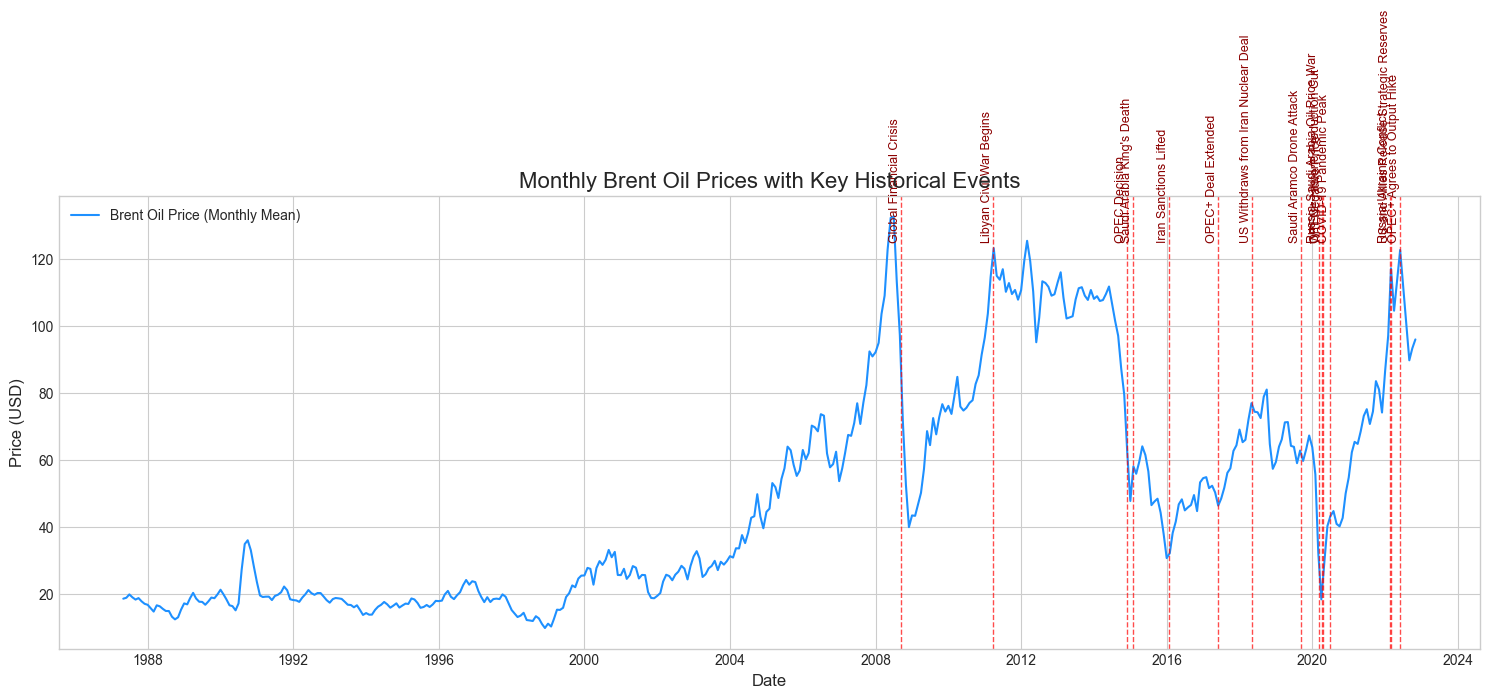

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(df_prices_monthly.index, df_prices_monthly['Price'], 
         label='Brent Oil Price (Monthly Mean)', color='dodgerblue')

# Plot vertical lines for each key event
for date, event_name in zip(df_events['Date'], df_events['Event']):
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.text(date, plt.gca().get_ylim()[1] * 0.9, event_name, 
             rotation=90, va='bottom', ha='right', fontsize=9, color='darkred')

plt.title('Monthly Brent Oil Prices with Key Historical Events', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



**Conclusion**
- The EDA shows a clear, non-stationary time series with significant price swings over time. The monthly resampling smooths the data and makes it easier to observe these long-term changes. By plotting the key events, we can visually identify potential correlations between these events and sharp increases or decreases in oil prices. This preliminary analysis confirms that the data is ready for a more rigorous statistical approach using our Bayesian change point model.

# This is below are just first craft of the EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path = '../data/raw/brent_oil_prices.csv'
raw_df = pd.read_csv(file_path)

# Display basic information
print(raw_df.head())
print(raw_df.info())
print(raw_df.describe())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


### Convert Date, Set Index, and Plot

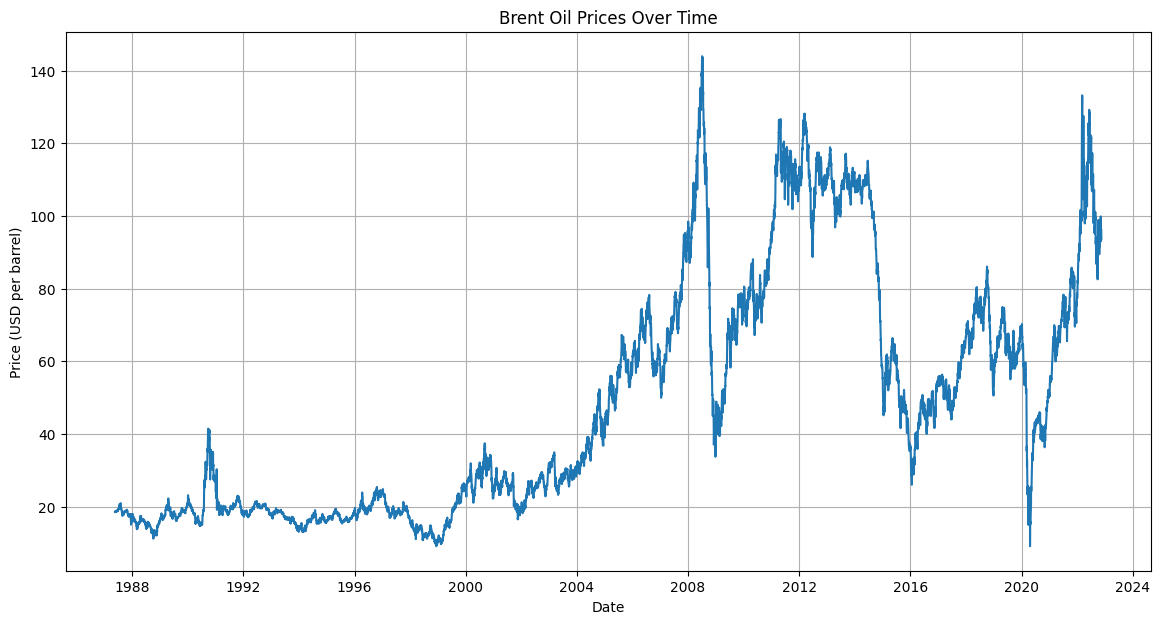

In [4]:
# Convert 'Date' column to datetime objects with mixed formats
raw_df['Date'] = pd.to_datetime(raw_df['Date'], format='mixed')

# Set 'Date' as index
raw_df.set_index('Date', inplace=True)

# Sort by date to ensure time series order
raw_df.sort_index(inplace=True)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(raw_df['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.show()


### ADF Test for Stationarity

In [5]:
# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

check_stationarity(raw_df['Price'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.993856
p-value                           0.289274
#Lags Used                       29.000000
Number of Observations Used    8981.000000
Critical Value (1%)              -3.431078
Critical Value (5%)              -2.861862
Critical Value (10%)             -2.566941
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### Modeling Implications

Discuss how these properties inform modeling choices (to be filled in after running the notebook).

